<a href="https://colab.research.google.com/github/sheikhi-a/Data_science_with_python/blob/main/Data_science_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Some traditional  statistical plots

By Ayyub Sheikhi

Department of statistics,

Shahid Bahonar University of Kerman, Iran

**1-Histogram**





In [29]:
# Data reading # header=None

import pandas as pd
data = pd.read_csv("data_bmi.csv")
data.shape
data.head()















,OBS,AGE,BMI,FFNUM,TEMP( 0F),GENDER,EXERCISE LEVEL,QUESTION
0,1,26,23.2,0,61.0,0,1,1
1,2,30,30.2,9,65.5,1,3,2
2,3,32,28.9,17,59.6,1,3,4
3,4,37,22.4,1,68.4,1,2,3
4,5,33,25.5,7,64.5,0,3,5


(array([7., 3., 4., 1., 2.]),
 array([20.8 , 23.92, 27.04, 30.16, 33.28, 36.4 ]),
 <BarContainer object of 5 artists>)

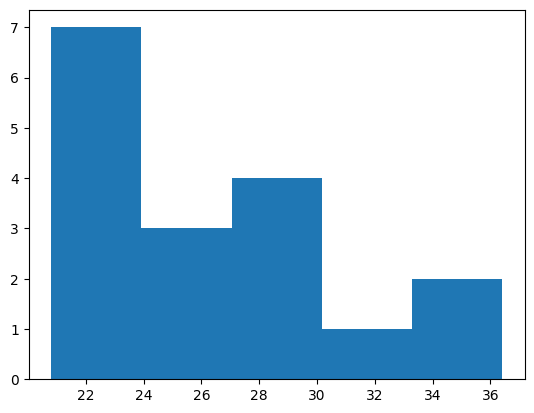

In [21]:
import matplotlib.pyplot as plt
#fig = plt.figure(figsize =(10, 7))
plt.hist(data.BMI, color='red')
plt.show()

plt.hist(data.AGE)
plt.xlabel("AGE")
#plt.ylabel("Frequency")
#plt.title("Histogram of BMI")
plt.show()







plt.hist(data.BMI,  bins=5)
plt.hist("BMI", data=data)


plt.hist("TEMP( 0F)", data=data)



2.Boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x7ebb547133d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ebb546806d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ebb54713fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ebb54681f00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ebb54682470>],
 'means': []}

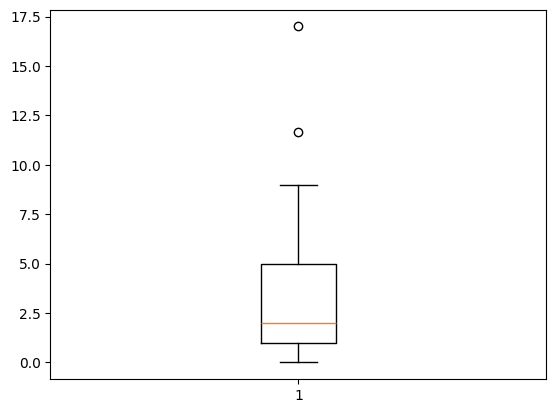

In [50]:
plt.boxplot(data.BMI)
#plt.boxplot("BMI", data=data)

plt.boxplot(data.BMI, vert=False)

#Rename a variable
data = data.rename(columns={'TEMP( 0F)': 'TEMP'})
#data = data.rename(columns={'TEMP( 0F)': 'TEMP', 'AGE': 'Age'})

data.head(5)

plt.figure(figsize=(10, 7))
plt.hist(data.BMI, bins=10)
plt.show()
plt.figure(figsize=(10, 2))
plt.boxplot(data.BMI, vert=False)
plt.show()




plt.boxplot("EXERCISE LEVEL", data=data)
plt.boxplot("FFNUM", data=data) #OUTLIER


from statistics import mean
data["FFNUM"][16] = mean(data.FFNUM)
data.FFNUM[16]=mean(data.FFNUM)

plt.boxplot("FFNUM", data=data) #OUTLIER







# Comparing several groups using box plot

In [ ]:
import seaborn as sns

sns.boxplot(x='GENDER', y='BMI',data=data)
data.dtypes

data['GENDER'] = data['GENDER'].map({0: 'Female', 1: 'Male'})
data.dtypes

sns.boxplot(x='EXERCISE LEVEL', y='BMI',data=data)

sns.boxplot(x='EXERCISE LEVEL', y='BMI',hue='GENDER',data=data)


Fitting a normal curve on a histogram

<ipython-input-29-8a8930b4eeae>:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:grey'` for the same effect.

  sns.violinplot(x='EXERCISE LEVEL', y='AGE',hue='GENDER',data=data, inner=None, color='grey')


<Axes: xlabel='EXERCISE LEVEL', ylabel='AGE'>

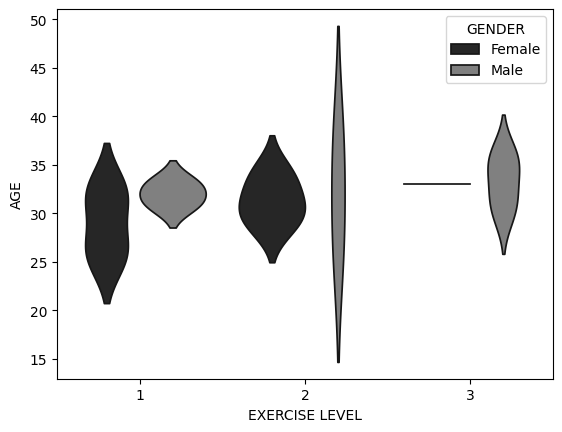

In [ ]:

plt.violinplot(data.AGE)
sns.violinplot(x='GENDER', y='AGE',data=data)
sns.violinplot(x='EXERCISE LEVEL', y='BMI',data=data)
sns.violinplot(x='EXERCISE LEVEL', y='BMI',hue='GENDER',data=data)

sns.violinplot(x='EXERCISE LEVEL', y='AGE',hue='GENDER',data=data, inner=None, color='grey')





# statistical visualisation for categorical data

<Axes: xlabel='GENDER'>

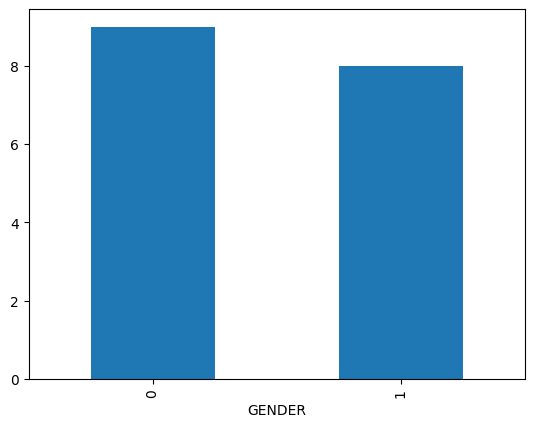

In [ ]:
data['EXERCISE LEVEL'].value_counts().plot(kind='pie')
data.head()

,OBS,AGE,BMI,FFNUM,TEMP( 0F),GENDER,EXERCISE LEVEL,QUESTION
0,1,26,23.2,0,61.0,0,1,1
1,2,30,30.2,9,65.5,1,3,2
2,3,32,28.9,17,59.6,1,3,4
3,4,37,22.4,1,68.4,1,2,3
4,5,33,25.5,7,64.5,0,3,5


In [ ]:
data.GENDER.value_counts()

data.GENDER.value_counts().plot(kind='bar')



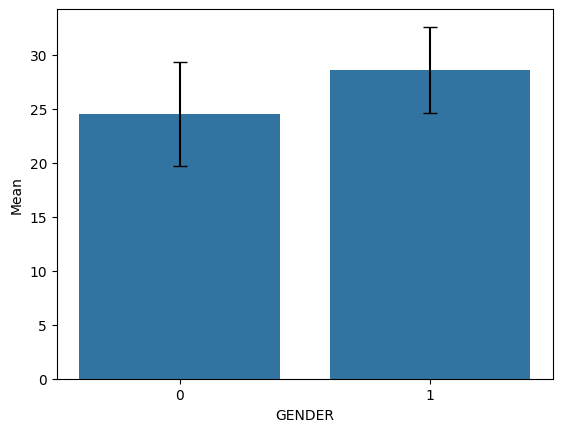

In [ ]:
mean_bmi = data.groupby("GENDER")["BMI"].mean().reset_index()
mean_bmi1=pd.DataFrame(mean_bmi)
sns.barplot(data=mean_bmi1, x="GENDER", y="BMI")


mean_std_bmi = data.groupby("GENDER")["BMI"].agg(Mean="mean", Std="std").reset_index()
mean_std_bmi1=pd.DataFrame(mean_std_bmi)
sns.barplot(data=mean_std_bmi1, x="GENDER", y="Mean")
for index, row in mean_std_bmi1.iterrows():
    plt.errorbar(
        x=index, y=row["Mean"], yerr=row["Std"], fmt='none', capsize=5, color="black"
    )





Text(0, 0.5, 'BMI')

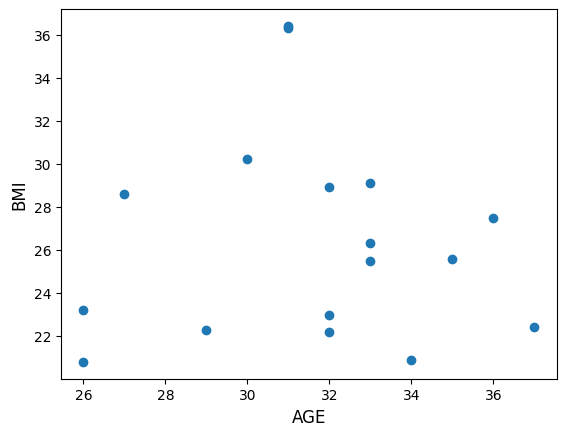

In [ ]:
plt.scamean_std_bmitter(data.AGE,data.BMI)
plt.xlabel("AGE")
plt.ylabel("BMI", fontsize=12)

sns.scatterplot( x="AGE", y="BMI", hue="GENDER", data=data)

sns.scatterplot( x="AGE", y="BMI", hue="EXERCISE LEVEL", data=data)



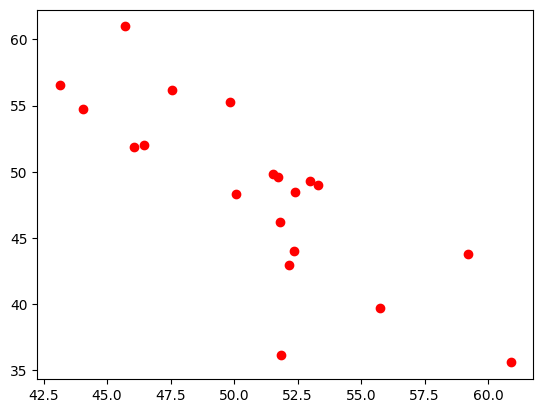

In [ ]:
import numpy as np

x1 = np.random.normal(50, 5, 20)
y1=x1+np.random.normal(0, 5, 20)
y2=100-x1+np.random.normal(0, 5, 20)
plt.scatter(x1, y1,color='blue')
plt.scatter(x1, y2, color='blue')





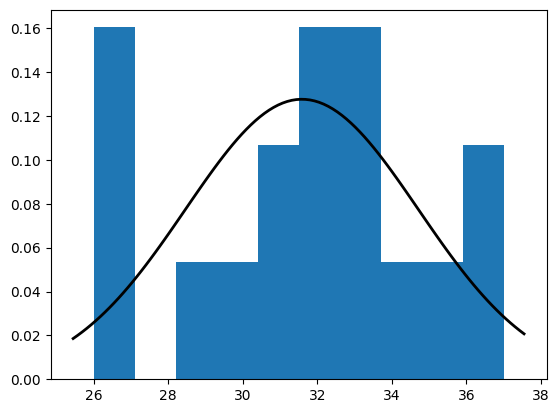

In [ ]:
import numpy as np
from scipy.stats import norm

mu, std = norm.fit(data.AGE)

plt.hist(data.AGE, bins=10, density=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Fit')


plt.show()